In [4]:
%pylab inline
import yt 

Populating the interactive namespace from numpy and matplotlib


In [13]:
cd /project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses4/trunk/ramses/bin


In [14]:
yt.funcs.mylog.setLevel(50)

In [20]:
def plot_time_slice(physical_quantity,timestep,zmin="",zmax="" ,text="",title="",zoom_factor="",velocity=True,grid=False,save=False,log=True,plot_size=5):
    ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_axes_unit('pc')
    slc.set_figure_size(plot_size)
    if (log==False):
        slc.set_log(physical_quantity, False)
    if zoom_factor!="":
        slc.zoom(zoom_factor)
    if zmin!="" and zmax!="":
        slc.set_zlim(physical_quantity, zmin,zmax)
    slc.set_cmap(physical_quantity,"rainbow")
    slc.set_font_size(20)
    if title!="":
        slc.annotate_title(title)
    if text!="":
        slc.annotate_text((0.1, 0.1),text, coord_system='axis')
    slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
    slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
    if (velocity):
        slc.annotate_velocity()
    if(grid):
        slc.annotate_grids()
    if (save):
       name  =str(timestep)#physical_quantity[:3]+str(timestep)
       slc.save(name)
    else:
       slc.show()


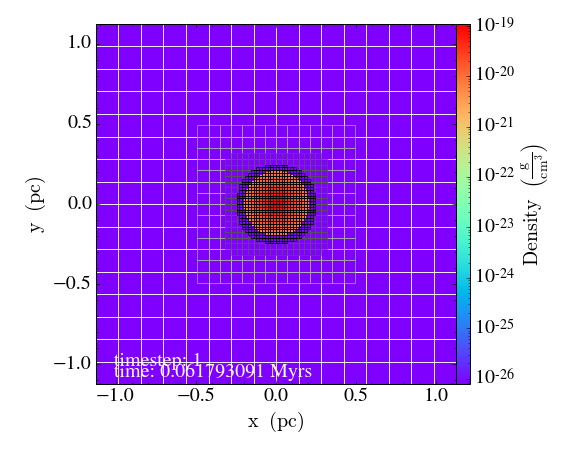

In [21]:
plot_time_slice("density",1,grid=True)

In [56]:
import yt
def check_IC_profiles(timestep=1):
    from mpl_toolkits.axes_grid1 import AxesGrid
    ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    fig = plt.figure()
    grid = AxesGrid(fig, ( (0.1, 0.1, 0.8, 0.8)),
                    nrows_ncols = (1, 3),
                    axes_pad = 1.0,
                    label_mode = "1",
                    share_all = True,
                    cbar_location="right",
                    cbar_mode="each",
                    cbar_size="3%",
                    cbar_pad="0%")
    fields = ['density','pressure','temperature']
    slc = yt.SlicePlot(ds, 'z', fields)
    slc.set_log('pressure', False)
    slc.set_axes_unit('pc')
    slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
    slc.annotate_velocity()
    slc.set_font_size(12)
    for i, field in enumerate(fields):
        plot = slc.plots[field]
        plot.figure = fig
        slc.set_cmap(field,"rainbow")
        plot.axes = grid[i].axes
        plot.cax = grid.cbar_axes[i]
        slc._setup_plots()

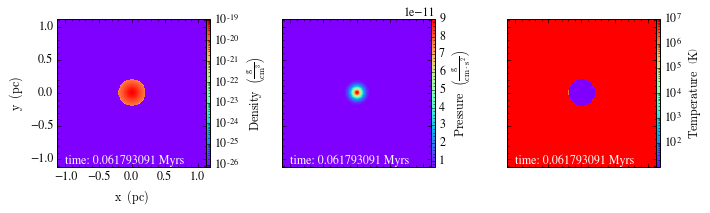

In [55]:
check_IC_profiles()